In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')

In [3]:
df['CDR'].fillna(0, inplace=True)
labels = df['CDR']!=0

In [4]:
tra = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/FSL_SEG/'
    for img in os.listdir(path1):
        if img.endswith('tra_90.gif'):
            tra.append(plt.imread(path1+img))
tra = np.array(tra).astype(np.float64)/255

In [128]:
tra = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_tra_90.gif'):
            tra.append(plt.imread(path1+img))
tra = np.array(tra).astype(np.float64)/255

In [137]:
sag = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_sag_95.gif'):
            sag.append(plt.imread(path1+img))
sag = np.array(sag).astype(np.float64)/255

In [138]:
cor = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_cor_110.gif'):
            cor.append(plt.imread(path1+img))
cor = np.array(cor).astype(np.float64)/255

In [139]:
trat = np.transpose(tra, axes=[0,2,1])

In [140]:
con = np.concatenate([trat, sag, cor], axis=2)

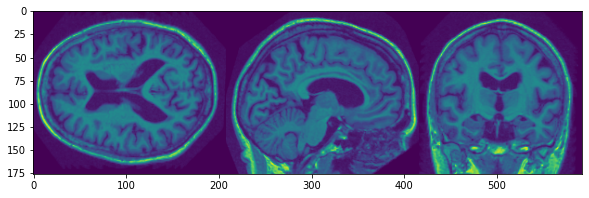

In [142]:
plt.imshow(con[0])

In [152]:
tra1 = []
for path in fpdf['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_tra_90.gif'):
            tra1.append(plt.imread(path1+img))
tra1 = np.array(tra1).astype(np.float64)/255

In [143]:
HEIGHT = con.shape[1]
WIDTH = con.shape[2]

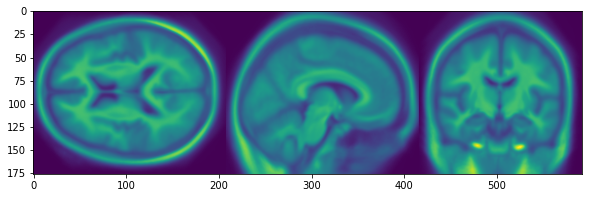

In [144]:
plt.imshow(np.mean(con, axis=0), vmax=0.5)

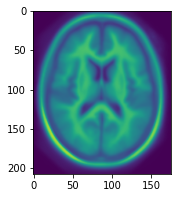

In [109]:
plt.imshow(np.mean(tra, axis=0), vmax=0.5)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(con, labels.astype(int), test_size=0.25, random_state = 42)

In [97]:
X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(df, labels.astype(int), test_size=0.25, random_state = 42)

In [146]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same"))
model.add(Conv2D(8, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(Conv2D(16, 3, activation="relu", padding="same"))
model.add(Conv2D(16, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
#model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
#model.add(Conv2D(32, 3, activation="relu", padding="same"))
#model.add(Conv2D(32, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(Flatten())
model.add(Dense(units=64, activation="relu", kernel_regularizer='l2'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 176, 592, 8)       80        
                                                                 
 conv2d_9 (Conv2D)           (None, 176, 592, 8)       584       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 88, 296, 8)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 88, 296, 16)       1168      
                                                                 
 conv2d_11 (Conv2D)          (None, 88, 296, 16)       2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 44, 148, 16)      0         
 2D)                                                  

In [147]:
training = model.fit(X_train, y_train, batch_size = 32, validation_split=0.2, epochs = 20)
        #callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.0*10**(-epoch/30))])

Epoch 1/20


2022-08-19 15:53:54.641705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 1.0717 - accuracy: 0.7548

2022-08-19 15:54:05.716222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 16s 1s/step - loss: 1.0717 - accuracy: 0.7548 - val_loss: 0.6861 - val_accuracy: 0.7727
Epoch 2/20
9/9 [==============================] - 7s 707ms/step - loss: 0.7040 - accuracy: 0.7625 - val_loss: 0.6235 - val_accuracy: 0.7727
Epoch 3/20
9/9 [==============================] - 7s 825ms/step - loss: 0.6135 - accuracy: 0.7625 - val_loss: 0.5618 - val_accuracy: 0.7727
Epoch 4/20
9/9 [==============================] - 7s 802ms/step - loss: 0.5764 - accuracy: 0.7625 - val_loss: 0.5480 - val_accuracy: 0.7727
Epoch 5/20
9/9 [==============================] - 9s 1s/step - loss: 0.5343 - accuracy: 0.7625 - val_loss: 0.6288 - val_accuracy: 0.7879
Epoch 6/20
9/9 [==============================] - 8s 837ms/step - loss: 0.6167 - accuracy: 0.7548 - val_loss: 0.5830 - val_accuracy: 0.8333
Epoch 7/20
9/9 [==============================] - 8s 910ms/step - loss: 0.5675 - accuracy: 0.7663 - val_loss: 0.5158 - val_accuracy: 0.7727
Epoch 8/20
9/9 [====================

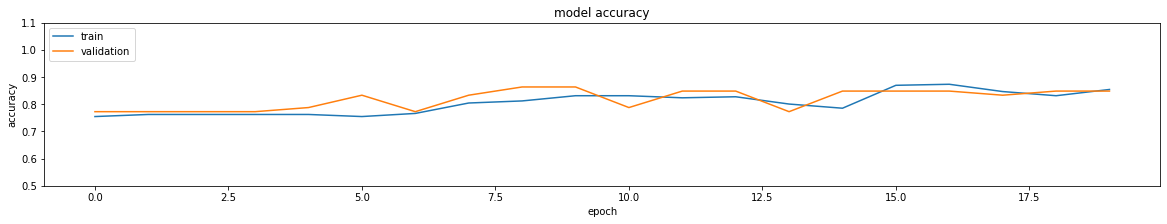

In [148]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

2022-08-19 15:56:50.083125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.78
recall:  0.83
precision:  0.49


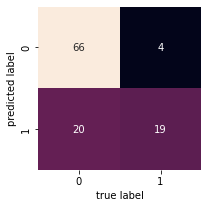

In [149]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

In [76]:
p1  = np.where(y_pred[:,0]==1)[0]
t0 = np.where(y_test==0)[0]

In [150]:
fp = np.where(np.all(np.array([y_pred[:,0]==1, y_test.values==0]).T, axis=1))[0]

In [153]:
fpdf = X_testdf.iloc[fp]
fpdf

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
78,OAS1_0083_MR1,F,R,90,5.0,3.0,27.0,0.0,1200,0.727,1.462,NaN
305,OAS1_0338_MR1,M,R,77,4.0,1.0,29.0,0.0,1818,0.736,0.965,NaN
30,OAS1_0033_MR1,F,R,80,4.0,2.0,29.0,0.0,1323,0.735,1.326,NaN
70,OAS1_0075_MR1,F,R,83,3.0,2.0,30.0,0.0,1335,0.720,1.314,NaN
360,OAS1_0398_MR1,M,R,71,5.0,1.0,30.0,0.0,1769,0.716,0.992,NaN
181,OAS1_0199_MR1,M,R,69,5.0,1.0,30.0,0.0,1601,0.784,1.096,NaN
291,OAS1_0322_MR1,F,R,65,3.0,4.0,29.0,0.0,1335,0.776,1.315,NaN
157,OAS1_0169_MR1,F,R,88,2.0,3.0,30.0,0.0,1445,0.718,1.215,NaN
382,OAS1_0422_MR1,F,R,69,4.0,3.0,29.0,0.0,1380,0.809,1.272,NaN
404,OAS1_0446_MR1,F,R,80,2.0,4.0,30.0,0.0,1390,0.748,1.263,NaN


(0.0, 1.1)

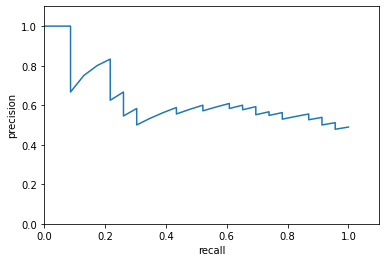

In [11]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])

In [29]:
img = X_train[0]
img2 = img.reshape(1,208,176,1)
op = model.layers[0](img2)
img4 = op.numpy()[0][:,:]

In [30]:
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)

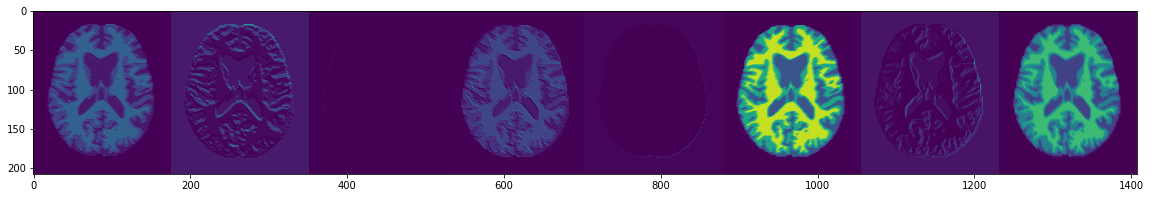

In [28]:
plt.rcParams["figure.figsize"] = (20,3)
plt.imshow(img5)


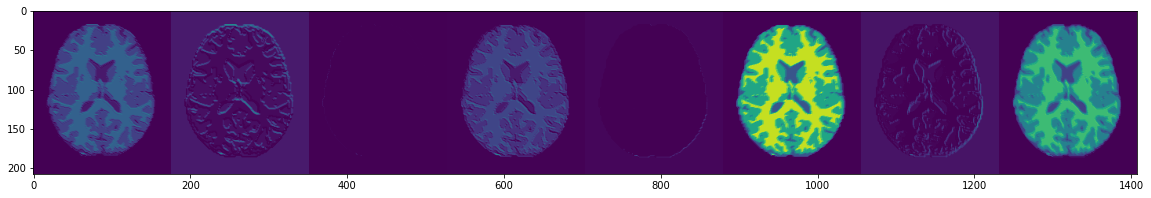

In [31]:
plt.imshow(img5)

In [34]:
weights = model.layers[0].get_weights()

In [38]:
weights[0].shape

(3, 3, 1, 8)

In [39]:
weights[1]

array([-0.03064367,  0.04551708, -0.00871194,  0.00418096,  0.01118691,
       -0.03355191,  0.03223577, -0.02921563], dtype=float32)

In [43]:
weights[0][:,:,:,1]

array([[[-0.2169433 ],
        [-0.20295264],
        [ 0.00092966]],

       [[ 0.00577237],
        [ 0.05042013],
        [-0.26410985]],

       [[ 0.2611627 ],
        [ 0.26010972],
        [ 0.06478966]]], dtype=float32)

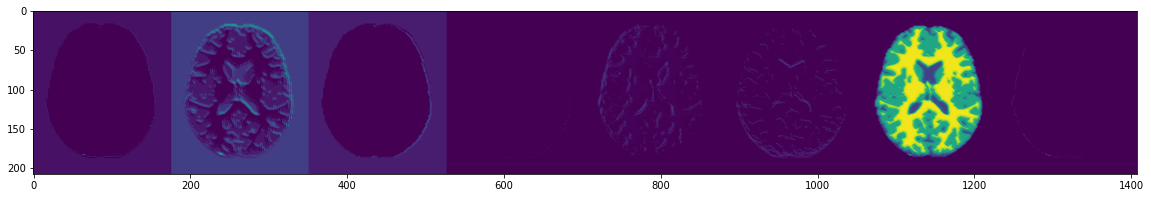

In [45]:
op2 = model.layers[1](op)
img4 = op2.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5)

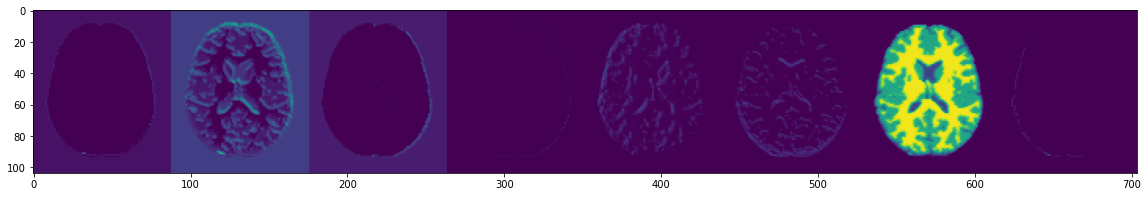

In [46]:
op3 = model.layers[2](op2)
img4 = op3.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5)

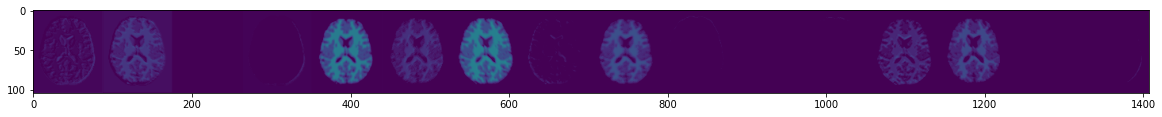

In [51]:
op4 = model.layers[3](op3)
img4 = op4.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5, vmax=1, vmin=0)